Using TensorFlow backend.


Train on 24 samples, validate on 6 samples
Epoch 1/20
 - 2s - loss: 0.6950 - accuracy: 0.5833 - val_loss: 0.6184 - val_accuracy: 0.5000
Epoch 2/20
 - 0s - loss: 0.6249 - accuracy: 0.4583 - val_loss: 0.5918 - val_accuracy: 0.5000
Epoch 3/20
 - 0s - loss: 0.5281 - accuracy: 0.7917 - val_loss: 0.5666 - val_accuracy: 0.6667
Epoch 4/20
 - 0s - loss: 0.6196 - accuracy: 0.5417 - val_loss: 0.5398 - val_accuracy: 0.6667
Epoch 5/20
 - 0s - loss: 0.4882 - accuracy: 0.7083 - val_loss: 0.5192 - val_accuracy: 0.6667
Epoch 6/20
 - 0s - loss: 0.4673 - accuracy: 0.7500 - val_loss: 0.4759 - val_accuracy: 0.6667
Epoch 7/20
 - 0s - loss: 0.4376 - accuracy: 0.9167 - val_loss: 0.4548 - val_accuracy: 0.6667
Epoch 8/20
 - 0s - loss: 0.4427 - accuracy: 0.8333 - val_loss: 0.4203 - val_accuracy: 0.6667
Epoch 9/20
 - 0s - loss: 0.2874 - accuracy: 0.9583 - val_loss: 0.4723 - val_accuracy: 0.6667
Epoch 10/20
 - 0s - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.4717 - val_accuracy: 0.6667
Epoch 11/20
 - 0s - loss: 

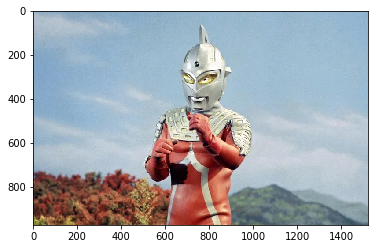

In [2]:
#step1
!pip install tensorflow
!pip install scikit-image
!pip install sklearn
!pip install matplotlib

#step2
from tensorflow import keras
import numpy as np
import io
from skimage import io #scikit-image
from sklearn.datasets import load_files
from PIL import Image
import matplotlib.pyplot as plt


#step3
def loadData(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    labels = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    
  
    img_result = []
    for i in range(len(files)):
      image = io.imread(files[i])
      image = Image.fromarray(image)
      image=image.convert('RGB').resize((28,28))
      image = np.array(image)
      img_result.append(image)

    return np.asarray(img_result, dtype=np.float32), np.asarray(labels, dtype=np.int32),target_labels

  
#step4
x_Train, y_Train,target_labels = loadData('hero_dataset/train/')
x_Test, y_Test,target_labels = loadData('hero_dataset/valid/')

#step5
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_TrainOneHot = keras.utils.to_categorical(y_Train)
y_TestOneHot = keras.utils.to_categorical(y_Test)


from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5), 
                 padding='same',
                 input_shape=(28,28,3),
                 activation='relu'))
                                    
                                    
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))



#step6
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, verbose=2)

#step7
model.save('hero_model.h5')


#step8
import tensorflow as tf
new_model= tf.keras.models.load_model(filepath="hero_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model( new_model)
tfmodel = converter.convert()
open ("hero.tflite" , "wb") .write(tfmodel)



#step9
def predict(img_path):
  image = io.imread(img_path)
  plt.imshow(image) 
  image = Image.fromarray(image)
  image=image.convert('RGB').resize((28,28))
  image = np.array(image)
  image = image.reshape(1,28,28,3)
  image = image / 255
  prediction = model.predict(image)
  print(target_labels)
  print(prediction)
  print(np.argmax(prediction))
  print(target_labels[np.argmax(prediction)])




#step10
predict('predict/kamenRider.JPG')

#step11
predict('predict/ultraman.png')